# **Secret feature that everyone seems to be missing**

So far most of us understand the way this game is played, many kernels have done extraordinary analysis and indeed provided lot of insights even to the real life PubG Gamer. Features provided in the dataset are quite sufficient to extract most of the juice out, but according to me, one essential key is missing.

To talk about this, I want to start the reverse approach of this game. We have done seen really nice analysis so far which tells us features positively and negatively correlated to '**winning**' which are essentially the actions player performed.

![](http://)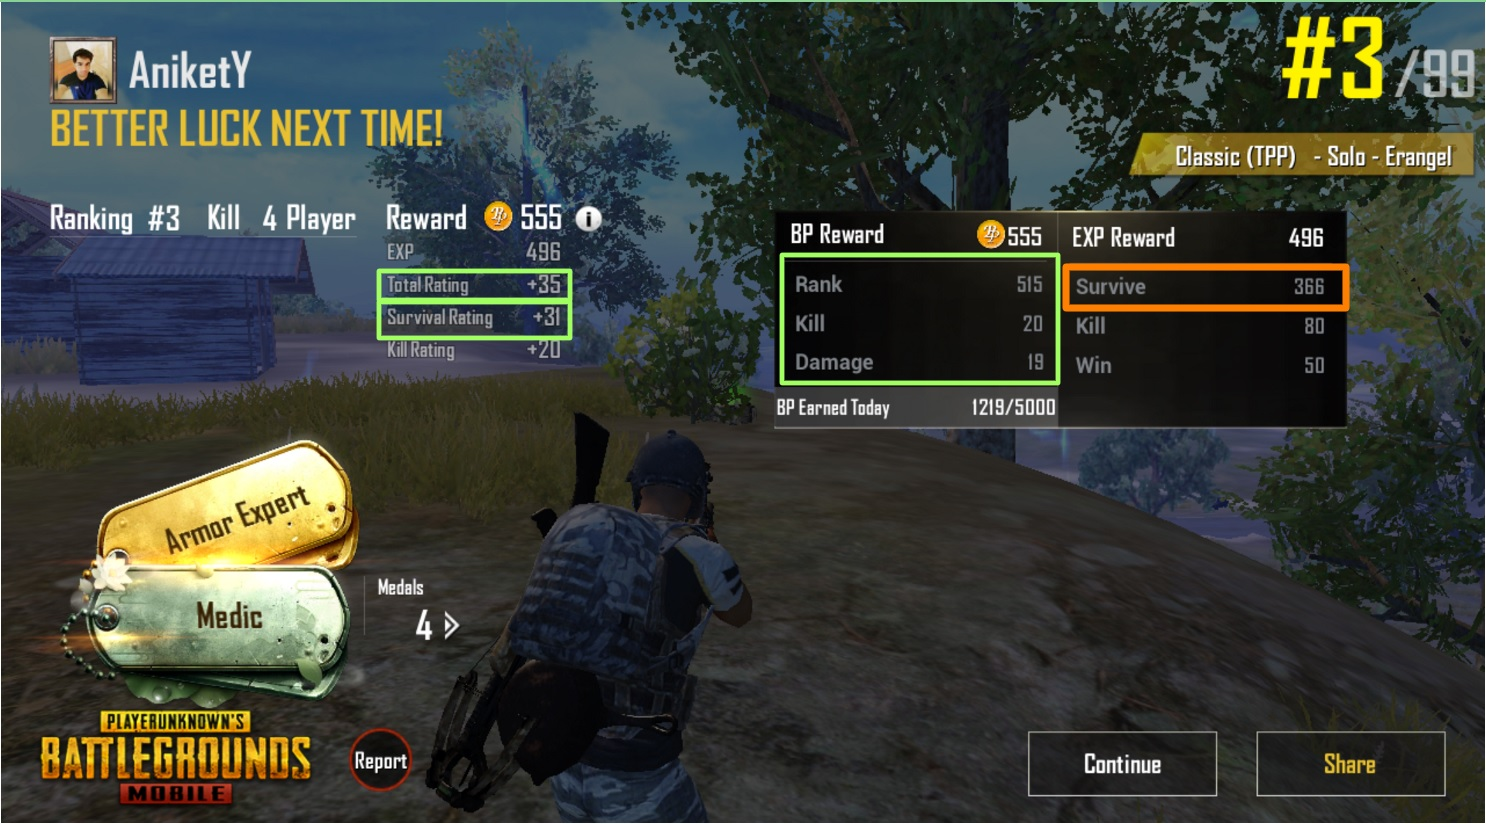

Here is the final screen after you die in the game or after you servived to the last man standing(or possibly last team standing).

Our features are provided here as a measure of our 'performance'. It explains alot, and so does our data. The most important feature here that is being missed here is **Survival Rating**. 

By the term 'Survival', it suggests for how much time, you managed to stay alive.

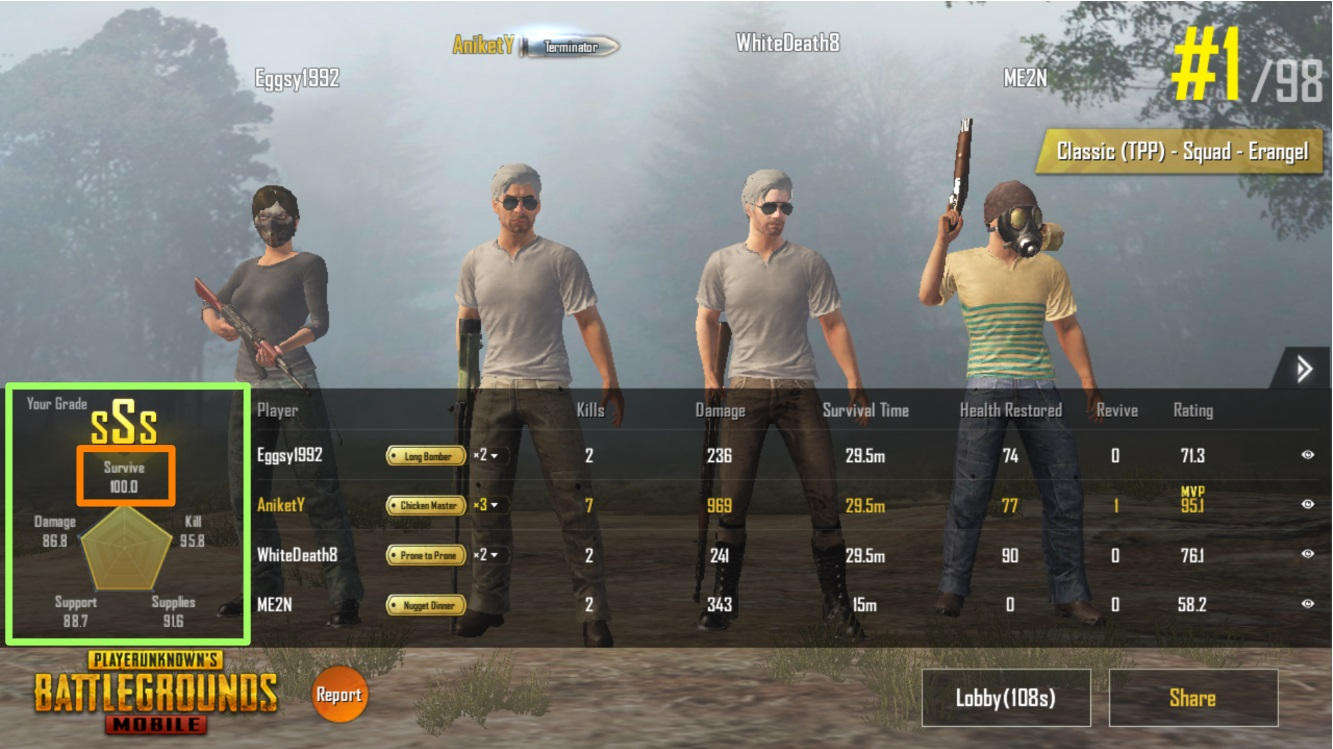

Here you can also see the top features according to Pubg. And **'Survive'** out of them.

## Trying to find for how much time player was alive

There is no feature in the dataset which suggests time entity, except for '*matchDuration*'. So how can we possibly find, for how much time, player was alive?

We know simple formula:

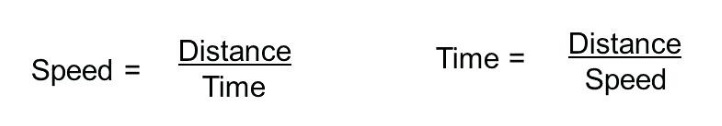

We know from the dataset for how much distance player has covered while running, driving/riding, swimming etc. If we know, by what speed player has done this activity, we have for how long (in time) player did that activity.

### Finding Running Time

There are huge varients in running speed as follows:

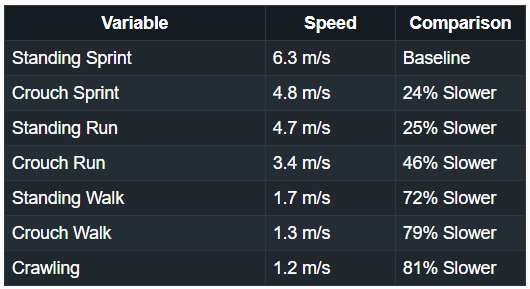
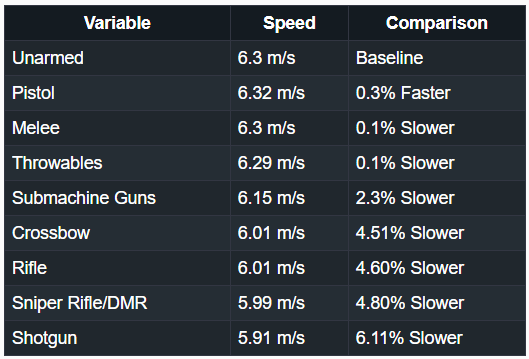

source: https://pubg.gamepedia.com/Movement_Speed

Standing Sprint Speed = 6.3 m/s (Baseline)

Even though, it matters on many variables that if the plyer is running with/without weapon, or if he/she is crowching/crawling, we assume the best posssible speed for simplicity.

                        Running Time(in seconds) = Distance covered by player(in meters) / Speed(m/s)
                        Running time = distance/(6.3 m/s)

### Finding Driving Time

As you might have guessed, many types and speeds:

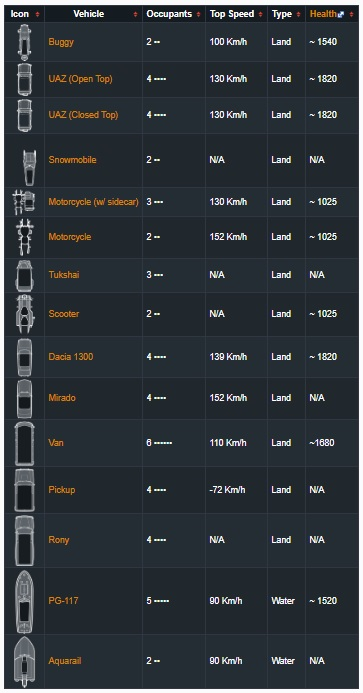

Source: https://pubg.gamepedia.com/Vehicles

We assumed the on an average people drive UAZ (without boost).
Need to convert km/s into m/s - 
130Km/Hr = 36.111 m/s

                                                Speed of car = 36.111 m/s

### Finding time taken to perform other activities

* Swimming Speed = Assumed that walking speed and swimming speed is equal.

#### Below Features need simple multiplication with how many times activity was done

* Boosts Speed = 4 sec assumed (we specifically know what type of boost will take how many seconds, but there are many types of boosts fall in this category having different values, and hence the assumptions)
* Heals Speed = 6 sec assumed
* DBNO Speed = 2 sec assumed
* Headshot Speed = 2 sec assumed
* Revive Speed = 10 sec observed
* Weapon aquiring Speed = 1 sec

So the total time in secconds where player was alive is greater than or equal to sum of time spent by player performing all above activities.
(It is perfectly safe to assume that most of the activities mentioned above can be done one at a time.)

    df['playerAliveTime'] =  (df['assists']*2) + 
                            (df['boosts']*4) + 
                            (df['damageDealt']/100)  + 
                            (df['DBNOs']*2) + 
                            (df['headshotKills']*1) + 
                            (df['heals']*6) + 
                            (df['kills']*2) + 
                            (df['revives']*10) + 
                            (df['rideDistance']/36.111) + 
                            (df['swimDistance']/6.3) + 
                            (df['vehicleDestroys']*6) + 
                            (df['walkDistance']/6.3) + 
                            (df['weaponsAcquired']*1)

## Solutions this feature provide

First of all by now you might have imagined immense correlation between 'PlayerAliveTime' with 'winPlacePerc'. But let me point to things this can explain.

*  We will be able to understand those few players' rankings who did very poor in the game but still are rated very high. Usually your better teammate completes the game at the better stage than you died/left, so yes having good teammate really matters.
*  We will be able to find positive correlation between highly active player with the score.

### Disadvantage

There are few numbers of players who play with extreme caution, hiding in buildings, grass and stay hidden unless forced otherwise. Our secret feature will off course give us less time as alive time.

But according to me this activity automatically balances user to the other side, since he/she usually recive less score in other areas (such as killing, damage etc).

## Conclusion

When applied this feature, I have observed that there was huge correlation between  'PlayerAliveTime' with 'winPlacePerc'.

(Will share correlation matrix shortly)

In model building feature imprtance index, I have found this reature rated in top 3.



**Hopefully this feature will enhance your model.**
I would love to know if this feature has enhanced your model.
Happy Kaggeling!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys

sns.set_style('darkgrid')
sns.set_palette('bone')

#pd.options.display.float_format = '{:.5g}'.format
pd.options.display.float_format = '{:,.3f}'.format

print(os.listdir("../input"))

In [ ]:
def toTapleList(list1,list2):
    return list(itertools.product(list1,list2))

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Load Data

In [ ]:
%%time
train = pd.read_csv('../input/train_V2.csv')
train = reduce_mem_usage(train)
test = pd.read_csv('../input/test_V2.csv')
test = reduce_mem_usage(test)
print(train.shape, test.shape)

In [ ]:
train.info()

In [ ]:
null_cnt = train.isnull().sum().sort_values()
print('null count:', null_cnt[null_cnt > 0])
# dropna
train.dropna(inplace=True)

In [ ]:
train.describe(include=np.number).drop('count').T

# Data Analysis

## Id, groupId, matchId

In [ ]:
for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', train[c].nunique())

In [ ]:
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']
cols.extend(['killPlace','winPlacePerc'])
group = train.groupby(['matchId','groupId'])[cols]

fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharey=True)
for df, ax in zip([group.mean(), group.min(), group.max()], ax.ravel()):
    sns.heatmap(df.corr(), annot=True, linewidths=.6, fmt='.2f', vmax=1, vmin=-1, center=0, cmap='Blues', ax=ax)

del df

# Feature Engineering

In [ ]:
all_data = train.append(test, sort=False).reset_index(drop=True)
del train, test
gc.collect()

## rank as percent

In [ ]:
match = all_data.groupby('matchId')
all_data['killPlacePerc'] = match['kills'].rank(pct=True).values
all_data['walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
#all_data['damageDealtPerc'] = match['damageDealt'].rank(pct=True).values

## distance

In [ ]:
all_data['_totalDistance'] = all_data['rideDistance'] + all_data['walkDistance'] + all_data['swimDistance']
all_data['playerAliveTime'] =  (all_data['assists']*2) + (all_data['boosts']*4) + (all_data['damageDealt']/100)  + (all_data['DBNOs']*2) + (all_data['headshotKills']*1) + (all_data['heals']*6) + (all_data['kills']*2) + (all_data['revives']*10) + (all_data['rideDistance']/36.111) + (all_data['swimDistance']/6.3) + (all_data['vehicleDestroys']*6) + (all_data['walkDistance']/6.3) + (all_data['weaponsAcquired']*1)
#all_data['_rideBin'] = (all_data['rideDistance'] > 0).astype(int)
#all_data['_swimBin'] = (all_data['swimDistance'] > 0).astype(int)

## new feature

In [ ]:
def fillInf(df, val):
    numcols = df.select_dtypes(include='number').columns
    cols = numcols[numcols != 'winPlacePerc']
    df[df == np.Inf] = np.NaN
    df[df == np.NINF] = np.NaN
    for c in cols: df[c].fillna(val, inplace=True)

In [ ]:
all_data['_healthItems'] = all_data['heals'] + all_data['boosts']
all_data['_headshotKillRate'] = all_data['headshotKills'] / all_data['kills']
all_data['_killPlaceOverMaxPlace'] = all_data['killPlace'] / all_data['maxPlace']
all_data['_killsOverWalkDistance'] = all_data['kills'] / all_data['walkDistance']
#all_data['_killsOverDistance'] = all_data['kills'] / all_data['_totalDistance']
#all_data['_walkDistancePerSec'] = all_data['walkDistance'] / all_data['matchDuration']

fillInf(all_data, 0)

## drop feature

In [ ]:
all_data.drop(['boosts','heals','killStreaks','DBNOs'], axis=1, inplace=True)
all_data.drop(['headshotKills','roadKills','vehicleDestroys'], axis=1, inplace=True)
all_data.drop(['rideDistance','swimDistance','matchDuration'], axis=1, inplace=True)
all_data.drop(['rankPoints','killPoints','winPoints'], axis=1, inplace=True)


## grouping

* need to predict the order of places for groups within each match.
* train on group-level instead of the user-level

In [ ]:
match = all_data.groupby(['matchId'])
group = all_data.groupby(['matchId','groupId','matchType'])

# target feature (max, min)
agg_col = list(all_data.columns)
exclude_agg_col = ['Id','matchId','groupId','matchType','maxPlace','numGroups','winPlacePerc']
for c in exclude_agg_col:
    agg_col.remove(c)
print(agg_col)

# target feature (sum)
sum_col = ['kills','killPlace','damageDealt','walkDistance','_healthItems']

In [ ]:
''' match sum, match max, match mean, group sum
'''
match_data = pd.concat([
    match.size().to_frame('m.players'), 
    match[sum_col].sum().rename(columns=lambda s: 'm.sum.' + s), 
    match[sum_col].max().rename(columns=lambda s: 'm.max.' + s),
    match[sum_col].mean().rename(columns=lambda s: 'm.mean.' + s)
    ], axis=1).reset_index()
match_data = pd.merge(match_data, 
    group[sum_col].sum().rename(columns=lambda s: 'sum.' + s).reset_index())
match_data = reduce_mem_usage(match_data)

print(match_data.shape)

In [ ]:
''' ranking of kills and killPlace in each match
'''
minKills = all_data.sort_values(['matchId','groupId','kills','killPlace']).groupby(
    ['matchId','groupId','kills']).first().reset_index().copy()
for n in np.arange(4):
    c = 'kills_' + str(n) + '_Place'
    nKills = (minKills['kills'] == n)
    minKills.loc[nKills, c] = minKills[nKills].groupby(['matchId'])['killPlace'].rank().values
    match_data = pd.merge(match_data, minKills[nKills][['matchId','groupId',c]], how='left')
    #match_data[c].fillna(0, inplace=True)
match_data = reduce_mem_usage(match_data)
del minKills, nKills

print(match_data.shape)

In [ ]:
match_data.head()


In [ ]:
''' group mean, max, min
'''
all_data = pd.concat([
    group.size().to_frame('players'),
    group.mean(),
    group[agg_col].max().rename(columns=lambda s: 'max.' + s),
    group[agg_col].min().rename(columns=lambda s: 'min.' + s),
    ], axis=1).reset_index()
all_data = reduce_mem_usage(all_data)

print(all_data.shape)

## aggregate feature

In [ ]:
numcols = all_data.select_dtypes(include='number').columns.values
numcols = numcols[numcols != 'winPlacePerc']

In [ ]:
''' match summary, max
'''
all_data = pd.merge(all_data, match_data)
del match_data
gc.collect()

all_data['enemy.players'] = all_data['m.players'] - all_data['players']
for c in sum_col:
    #all_data['enemy.' + c] = (all_data['m.sum.' + c] - all_data['sum.' + c]) / all_data['enemy.players']
    #all_data['p.sum_msum.' + c] = all_data['sum.' + c] / all_data['m.sum.' + c]
    #all_data['p.max_mmean.' + c] = all_data['max.' + c] / all_data['m.mean.' + c]
    all_data['p.max_msum.' + c] = all_data['max.' + c] / all_data['m.sum.' + c]
    all_data['p.max_mmax.' + c] = all_data['max.' + c] / all_data['m.max.' + c]
    all_data.drop(['m.sum.' + c, 'm.max.' + c], axis=1, inplace=True)
    
fillInf(all_data, 0)
print(all_data.shape)

In [ ]:
''' match rank
'''
match = all_data.groupby('matchId')
matchRank = match[numcols].rank(pct=True).rename(columns=lambda s: 'rank.' + s)
all_data = reduce_mem_usage(pd.concat([all_data, matchRank], axis=1))
rank_col = matchRank.columns
del matchRank
gc.collect()

# instead of rank(pct=True, method='dense')
match = all_data.groupby('matchId')
matchRank = match[rank_col].max().rename(columns=lambda s: 'max.' + s).reset_index()
all_data = pd.merge(all_data, matchRank)
for c in numcols:
    all_data['rank.' + c] = all_data['rank.' + c] / all_data['max.rank.' + c]
    all_data.drop(['max.rank.' + c], axis=1, inplace=True)
del matchRank
gc.collect()

print(all_data.shape)

## killPlace rank of group and kills

In [ ]:
killMinorRank = all_data[['matchId','min.kills','max.killPlace']].copy()
group = killMinorRank.groupby(['matchId','min.kills'])
killMinorRank['rank.minor.maxKillPlace'] = group.rank(pct=True).values
all_data = pd.merge(all_data, killMinorRank)

killMinorRank = all_data[['matchId','max.kills','min.killPlace']].copy()
group = killMinorRank.groupby(['matchId','max.kills'])
killMinorRank['rank.minor.minKillPlace'] = group.rank(pct=True).values
all_data = pd.merge(all_data, killMinorRank)

del killMinorRank
gc.collect()

## delete feature

In [ ]:
# drop constant column
constant_column = [col for col in all_data.columns if all_data[col].nunique() == 1]
print('drop columns:', constant_column)
all_data.drop(constant_column, axis=1, inplace=True)

## encode

In [ ]:
'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp
'''
all_data['matchType'] = all_data['matchType'].apply(mapper)

all_data = pd.concat([all_data, pd.get_dummies(all_data['matchType'])], axis=1)
all_data.drop(['matchType'], axis=1, inplace=True)

all_data['matchId'] = all_data['matchId'].apply(lambda x: int(x,16))
all_data['groupId'] = all_data['groupId'].apply(lambda x: int(x,16))

In [ ]:
null_cnt = all_data.isnull().sum().sort_values()
print(null_cnt[null_cnt > 0])

In [ ]:
#all_data.drop([],axis=1,inplace=True)

cols = [col for col in all_data.columns if col not in ['Id','matchId','groupId']]
for i, t in all_data.loc[:, cols].dtypes.iteritems():
    if t == object:
        all_data[i] = pd.factorize(all_data[i])[0]

all_data = reduce_mem_usage(all_data)
all_data.head()

# Predict

In [ ]:
X_train = all_data[all_data['winPlacePerc'].notnull()].reset_index(drop=True)
X_test = all_data[all_data['winPlacePerc'].isnull()].drop(['winPlacePerc'], axis=1).reset_index(drop=True)
del all_data
gc.collect()

Y_train = X_train.pop('winPlacePerc')
X_test_grp = X_test[['matchId','groupId']].copy()
train_matchId = X_train['matchId']

# drop matchId,groupId
X_train.drop(['matchId','groupId'], axis=1, inplace=True)
X_test.drop(['matchId','groupId'], axis=1, inplace=True)

print(X_train.shape, X_test.shape)

In [ ]:
print(pd.DataFrame([[val for val in dir()], [sys.getsizeof(eval(val)) for val in dir()]],
                   index=['name','size']).T.sort_values('size', ascending=False).reset_index(drop=True)[:10])

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import minmax_scale
import lightgbm as lgb

params={'learning_rate': 0.1,
        'objective':'mae',
        'metric':'mae',
        'num_leaves': 31,
        'verbose': 1,
        'random_state':42,
        'bagging_fraction': 0.7,
        'feature_fraction': 0.7
       }

reg = lgb.LGBMRegressor(**params, n_estimators=10000)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test, num_iteration=reg.best_iteration_)

In [ ]:
# Plot feature importance
feature_importance = reg.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[len(feature_importance) - 30:]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
X_train.columns[np.argsort(-feature_importance)].values


In [ ]:
X_test_grp['_nofit.winPlacePerc'] = pred

group = X_test_grp.groupby(['matchId'])
X_test_grp['winPlacePerc'] = pred
X_test_grp['_rank.winPlacePerc'] = group['winPlacePerc'].rank(method='min')
X_test = pd.concat([X_test, X_test_grp], axis=1)

In [ ]:
fullgroup = (X_test['numGroups'] == X_test['maxPlace'])

# full group (201366) --> calculate from rank
subset = X_test.loc[fullgroup]
X_test.loc[fullgroup, 'winPlacePerc'] = (subset['_rank.winPlacePerc'].values - 1) / (subset['maxPlace'].values - 1)

# not full group (684872) --> align with maxPlace
subset = X_test.loc[~fullgroup]
gap = 1.0 / (subset['maxPlace'].values - 1)
new_perc = np.around(subset['winPlacePerc'].values / gap) * gap  # half&up
X_test.loc[~fullgroup, 'winPlacePerc'] = new_perc

X_test['winPlacePerc'] = X_test['winPlacePerc'].clip(lower=0,upper=1)

In [ ]:
# edge cases
X_test.loc[X_test['maxPlace'] == 0, 'winPlacePerc'] = 0
X_test.loc[X_test['maxPlace'] == 1, 'winPlacePerc'] = 1  # nothing
X_test.loc[(X_test['maxPlace'] > 1) & (X_test['numGroups'] == 1), 'winPlacePerc'] = 0
X_test['winPlacePerc'].describe()

# Submit

In [ ]:
test = pd.read_csv('../input/test_V2.csv')
test['matchId'] = test['matchId'].apply(lambda x: int(x,16))
test['groupId'] = test['groupId'].apply(lambda x: int(x,16))

submission = pd.merge(test, X_test[['matchId','groupId','winPlacePerc']])
submission = submission[['Id','winPlacePerc']]
submission.to_csv("submission103.csv", index=False)